In [138]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

# Генерируем данные и строим модель логистической регрессии

In [139]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
X = x_data_generated
y = y_data_generated
sh = X.shape
sh

(100, 20)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [142]:
model.fit(X_train, y_train)

LogisticRegression()

In [143]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
cvs

0.8099999999999999

# Выбираем признаки на основе матрицы корреляции

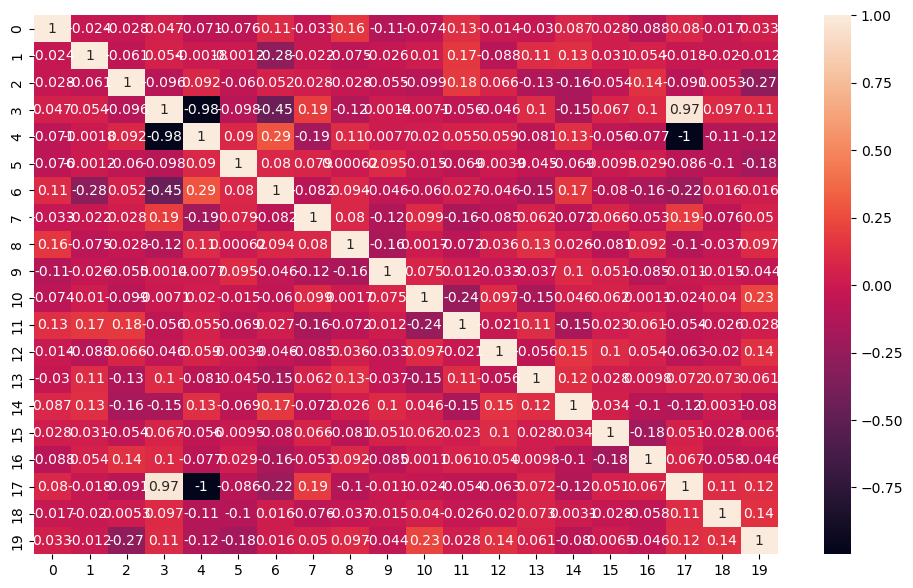

In [144]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)
plt.show()

In [145]:
X1 = (pd.DataFrame(X)).drop(columns = [3, 4, 17])
sh1 = X1.shape
sh1


(100, 17)

In [146]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X1_train, y_train)
cvs1 = cross_val_score(LogisticRegression(), X1, y, scoring='accuracy').mean()
cvs1

0.54

# Удаляем низковариативные признаки

In [148]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X2 = selector.fit_transform(X)
sh2 = X2.shape
sh2

(100, 20)

In [149]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [150]:
model = LogisticRegression()

In [151]:
model.fit(X2_train, y_train)

LogisticRegression()

In [152]:
cvs2 = cross_val_score(LogisticRegression(), X2, y, scoring='accuracy').mean()
cvs2

0.8099999999999999

# Выбираем 5 лучших признаков с помощью скоринговой функции для классификации f_classif

In [153]:
from sklearn.feature_selection import SelectKBest, f_classif

In [154]:
X3 = SelectKBest(f_classif, k=5).fit_transform(X, y)
sh3 = X3.shape
sh3

(100, 5)

In [155]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X3_train, y_train)
cvs3 = cross_val_score(LogisticRegression(), X3, y, scoring='accuracy').mean()
cvs3

0.8699999999999999

# Отбираем признаки с помощью логистической регрессии

In [156]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
X4 = selector.transform(X)
sh4 = X4.shape


(100, 8)

In [167]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X4)

In [168]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_sc_train, y_train)
cvs4 = cross_val_score(LogisticRegression(), X_sc, y, scoring='accuracy').mean()
cvs4

0.8100000000000002

# Отбираем признаки с помощью случайного леса и feature_selection

In [169]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [170]:
imp = pd.Series(clf.feature_importances_)
imp = imp.sort_values(ascending=False)
imp

4     0.249455
17    0.229776
3     0.158843
6     0.071238
1     0.054350
18    0.045679
10    0.035571
7     0.028157
12    0.018092
11    0.017204
5     0.014032
13    0.012896
15    0.010776
19    0.010490
2     0.008667
0     0.008634
14    0.007249
8     0.006802
16    0.006221
9     0.005869
dtype: float64

In [161]:
X5 = (pd.DataFrame(X)).drop(columns = [2, 0, 14,8,9, 16])
sh5 = X5.shape
sh5

(100, 14)

In [171]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X5_train, y_train)
cvs5 = cross_val_score(LogisticRegression(), X5, y, scoring='accuracy').mean()
cvs5

0.8299999999999998

# Отбираем признаки с помощью SequentalFeatureselection

In [172]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)
X6 = sfs.transform(X)
sh6 = X6.shape
sh6

(100, 3)

In [173]:
X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X6_train, y_train)
cvs6 = cross_val_score(LogisticRegression(), X6, y, scoring='accuracy').mean()
cvs6

0.8700000000000001

In [174]:
results = pd.DataFrame(columns=['Спосо выбора признаков','Количество Признаков', 'Средняя точность модели'])

results.loc[len(results)] = ['Nothing',sh[1], cvs]
results.loc[len(results)] = ['corr', sh1[1], cvs1]
results.loc[len(results)] = ['Treshold', sh2[1], cvs2]
results.loc[len(results)] = ['Kbest',sh3[1], cvs3]
results.loc[len(results)] = ['SelectFromModel',sh4[1], cvs4]
results.loc[len(results)] = ['Importance',sh5[1], cvs5]
results.loc[len(results)] = ['SequentalSelector',sh6[1], cvs6]
results

,Спосо выбора признаков,Количество Признаков,Средняя точность модели
0,Nothing,20,0.81
1,corr,17,0.54
2,Treshold,20,0.81
3,Kbest,5,0.87
4,SelectFromModel,8,0.81
5,Importance,14,0.83
6,SequentalSelector,3,0.87


# Выводы
В данном случае удаление скоррелированных признаков ухудшает метрику модели, а удаление низковариативных данных не влияет на результат. Остальные способы отбора признаков показали улучшение метрики, лучших результатов удалось достичь благодаря скоринговой функции для классификации f_classif и перебору признаков с помощью SequentalFeatureSelection